# MI 2 SoSe22: Exercise sheet 1

For more information, you can also check the solutions of all exercise sheets from another group of students of MI 2 from 2016 [in this repository](https://github.com/jrieke/machine-intelligence-2).

For this exercise sheet in particular, [here](https://www.askpython.com/python/examples/principal-component-analysis) there is a nice tutorial on PCA and its implementation in Python.

## Exercise H1.1: PCA: 2-dimensional Toy Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

##### a)

In [2]:
def center(x):
    '''Returns centered data'''
    x_centered = x - np.mean(x, axis = 0)
    return x_centered

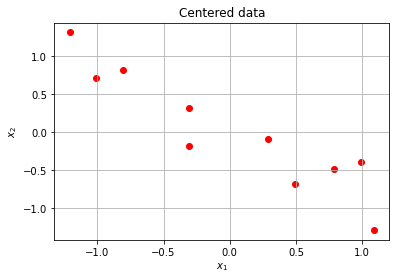

In [3]:
# Loads and center data (dimensions Nxp)
data = np.genfromtxt(fname='pca-data-2d.txt', delimiter='   ', dtype=float, skip_header = 0)
data_centered = center(data).T

# Scatter plot for centered data
plt.scatter(data_centered[0], data_centered[1], marker = 'o', color = 'r')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title("Centered data")
plt.grid()
plt.show()

##### b)

At this point the centered data ($x$) has dimensions $\mathbb{R}^{N \times P}$. We build a matrix where each column correspond to a particular eigenvector of the covariance matrix, a.k.a. Principal Component $e_i$. Each column of this matrix corresponds to a different eigenvector so it has dimensions $\mathbb{R}^{N \times N}$ and we denoted as $M$. The transformed data, now named $u \ \in \mathbb{R}^{N \times P}$ is obtained as
$$u = M^t x$$

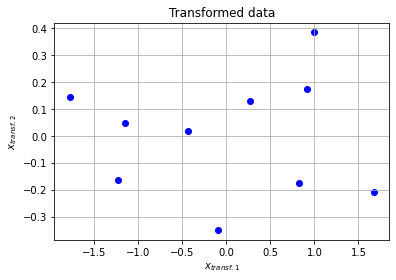

In [4]:
# Covariance and eigendecomposition
covariance = np.cov(data_centered)
eig_value, eig_vector = np.linalg.eig(covariance)

# Sorts eigenvalues and eigenvectors
sorted_index = np.argsort(eig_value)[::-1] # From highest to lowest
eig_value_sorted = eig_value[sorted_index]
eig_vector_sorted = eig_vector[:, sorted_index]

# Transforms centered data to one with diagonal covariance (u = M^t x)
data_transformed = np.dot(eig_vector_sorted.T, data_centered)

# Plots
plt.scatter(data_transformed[0], data_transformed[1], marker = 'o', color = 'b')
plt.xlabel('$x_{transf. 1}$')
plt.ylabel('$x_{transf. 2}$')
plt.title("Transformed data")
plt.grid()
plt.show()

##### c) 

Here we use the fact that each column of $M$ corresponds to a different eigenvector to define $e_1, e_2$. We also need to express the original data in the basis of PCs. To do so, we notice that the components of $x$ in that basis, namely $a_1, a_2$, are exactly the components of the transformed data. To see this we remember that $M$ is orthonormal, so $M \cdot M^t = I$ and then
$$ u = M^t \cdot x \ \Rightarrow \ x = M u = u_1 e_1 + u_2 e_2 + \dots + u_N e_N$$
where we see that what we used to call $a_i$ are exactly $u_i$.

Finally, we build the projected data
$$ x_{pc1} = u_1 e_1  \quad , \quad x_{pc2} = u_2 e_2$$
by running over all examples with a for loop.

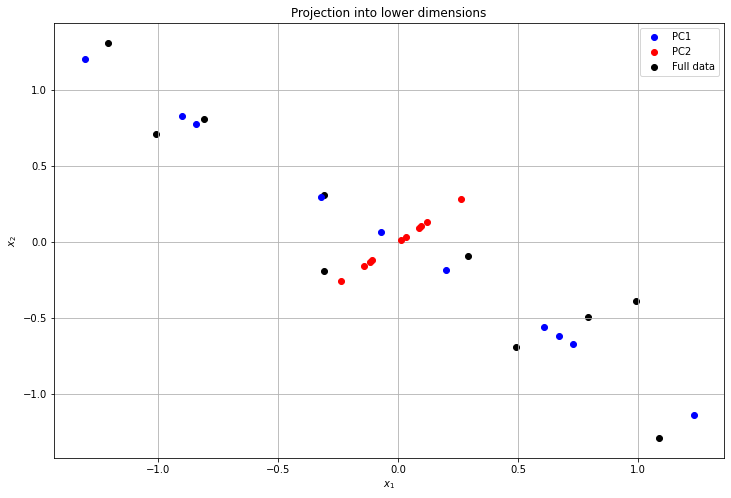

In [5]:
# PCs and projections of the data into PC1 and PC2
e1 = eig_vector_sorted[:,0]
e2 = eig_vector_sorted[:,1]
data_pc1 = np.array([u1*e1 for u1 in data_transformed[0]]).T
data_pc2 = np.array([u2*e2 for u2 in data_transformed[1]]).T

# Plots
plt.figure(figsize=(12,8))
plt.plot( data_pc1[0], data_pc1[1], 'bo', label = "PC1")
plt.plot( data_pc2[0], data_pc2[1], 'ro', label = "PC2")
plt.scatter( data_centered[0], data_centered[1], color = 'black', label = "Full data")
plt.xlabel('$x_{1}$')
plt.ylabel('$x_{2}$')
plt.title("Projection into lower dimensions")
plt.grid()
plt.legend()
plt.show()

### Exercise H1.2: PCA: 3-dimensional Toy Data

For the 3d plots it can be helpful to interact with the images. To do so we can activate the interaction mode by using `%matplotlib notebook`. To turn it off, we use `%matplotlib inline`.

In [6]:
#%matplotlib notebook
%matplotlib inline

##### a)

/var/folders/mp/jpsv41r92xn692pgzdtqmck00000gn/T/ipykernel_50716/2479212818.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data3d = np.genfromtxt(fname='pca-data-3d.txt', delimiter=',', dtype=np.float, skip_header = 1)


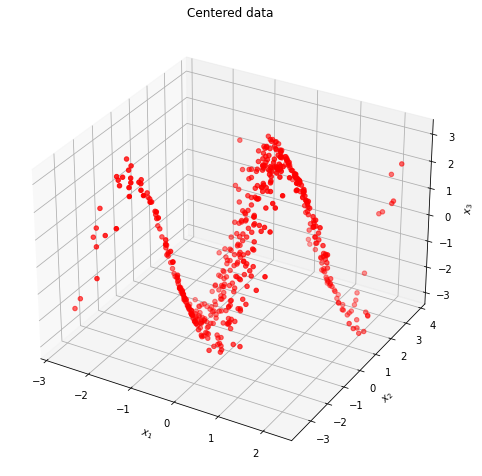

In [7]:
# Loads and center data
data3d = np.genfromtxt(fname='pca-data-3d.txt', delimiter=',', dtype=np.float, skip_header = 1)
data3d_centered = center(data3d).T

# 3D plots
fig = plt.figure(figsize=(8,10))
ax = fig.add_subplot(projection='3d')
ax.scatter(data3d_centered[0], data3d_centered[1], data3d_centered[2], marker = 'o', color = 'r')
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.set_zlabel("$x_3$")
ax.set_title("Centered data")
plt.show()

##### b)

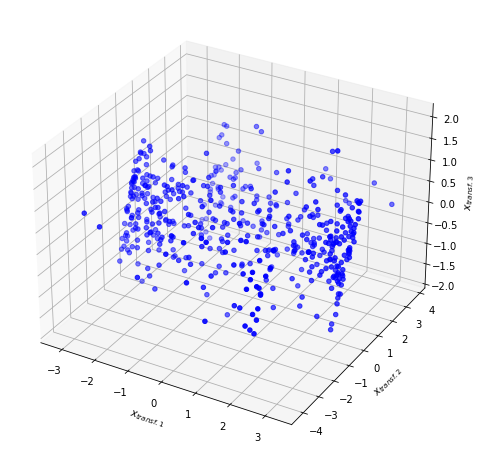

In [8]:
# Covariance and eigendecomposition
covariance3d = np.cov(data3d_centered)
eig_value3d, eig_vector3d = np.linalg.eig(covariance3d)

# Sorts eigenvalues and eigenvectors
sorted_index3d = np.argsort(eig_value3d)[::-1] # from highest to lowest
eig_value3d_sorted = eig_value3d[sorted_index]
eig_vector3d_sorted = eig_vector3d[:, sorted_index3d]

# Transforms centered data to one with diagonal covariance
data3d_transformed = np.dot(eig_vector3d_sorted.T, data3d_centered)

# Plots
fig = plt.figure(figsize=(8,10))
ax = fig.add_subplot(projection='3d')
ax.scatter(data3d_transformed[0], data3d_transformed[1], data3d_transformed[2], marker = 'o', color = 'b')
ax.set_xlabel('$x_{transf. 1}$')
ax.set_ylabel('$x_{transf. 2}$')
ax.set_zlabel('$x_{transf. 3}$')
plt.grid()
plt.show()

##### c)

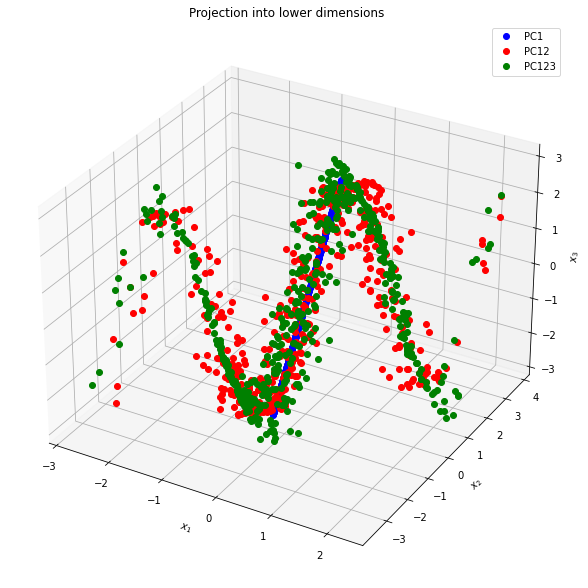

In [9]:
# PCs and projections of the data
e1 = eig_vector3d_sorted[:,0]
e2 = eig_vector3d_sorted[:,1]
e3 = eig_vector3d_sorted[:,2]
data_pc1 = np.array([u1*e1 for u1 in data3d_transformed[0]]).T
data_pc2 = np.array([u2*e2 for u2 in data3d_transformed[1]]).T
data_pc3 = np.array([u3*e3 for u3 in data3d_transformed[2]]).T

# Projections into PC12 and PC123 subspaces
data_pc12 = data_pc1 + data_pc2
data_pc123 = data_pc1 + data_pc2 + data_pc3

# Plots
fig = plt.figure(figsize=(10,16))
ax = fig.add_subplot(projection='3d')
ax.plot( data_pc1[0], data_pc1[1], data_pc1[2], 'bo', label = "PC1")
ax.plot( data_pc12[0], data_pc12[1], data_pc12[2], 'ro', label = "PC12")
# This is the same as plotting the entire data, but we do it in this way just to check that we get the same
ax.plot( data_pc123[0], data_pc123[1], data_pc123[2], 'go', label = "PC123") 
ax.set_xlabel('$x_{1}$')
ax.set_ylabel('$x_{2}$')
ax.set_zlabel('$x_{3}$')
ax.set_title("Projection into lower dimensions")
plt.grid()
plt.legend()
plt.show()

## Exercise H1.3: Projections of a dynamical system

In [10]:
# Loads and center data (both with dimensiones 20x100)
data = np.genfromtxt(fname='expDat.txt', delimiter=',', dtype=np.float, skip_header = 1)[:,1:] # remove first column
data_centered = center(data).T

/var/folders/mp/jpsv41r92xn692pgzdtqmck00000gn/T/ipykernel_50716/647631457.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data = np.genfromtxt(fname='expDat.txt', delimiter=',', dtype=np.float, skip_header = 1)[:,1:] # remove first column


#### a)

In [11]:
# Finds PCs
# Covariance and Eigendecomposition
covariance = np.cov(data_centered)
eig_value, eig_vector = np.linalg.eig(covariance)

# Sorting
sorted_index = np.argsort(eig_value)[::-1] # From highest to lowest
eig_value_sorted = eig_value[sorted_index]
eig_vector_sorted = eig_vector[:, sorted_index]

# Transforms centered data to one with diagonal covariance
data_transformed = np.dot(eig_vector_sorted.T, data_centered)

#### b)

In this case we have to plot the 100 points in a 2d-dimensional plot spanned by the first two PCs. In other words, we have to plot $a_1$ vs $a_2$ which are nothing but the first two components of the transformed data.

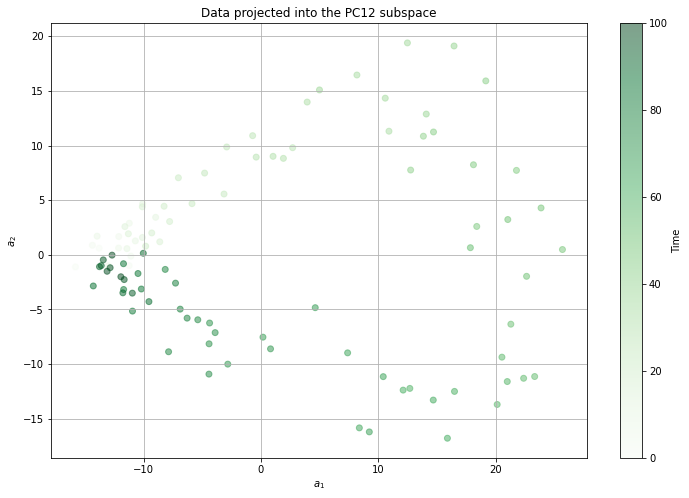

In [12]:
# Plots of projected data in PC12
colors = np.linspace(0,100,100)
plt.figure(figsize=(12,8))
plt.scatter( data_transformed[0], data_transformed[1], c = colors, cmap = "Greens", alpha = 0.5)
plt.xlabel('$a_{1}$')
plt.ylabel('$a_{2}$')
plt.title("Data projected into the PC12 subspace")
plt.colorbar(label = "Time")
plt.grid()
plt.show()

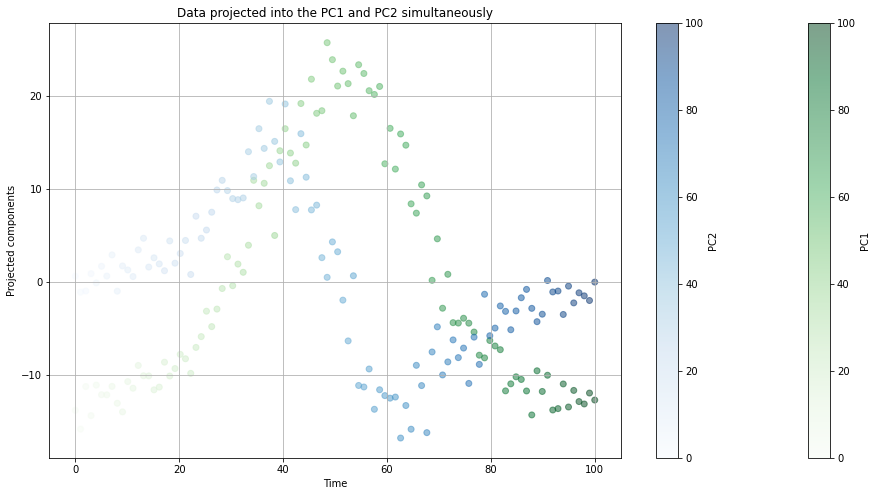

In [13]:
# Plots of projected data into PC1 and PC2 independently
plt.figure(figsize=(16,8))
time = np.linspace(0,100,100)
plt.scatter(time, data_transformed[0], c = colors, cmap = "Greens", alpha = 0.5, label = "PC1") # projected into PC1
plt.colorbar(label = "PC1")
plt.scatter(time, data_transformed[1], c = colors, cmap = "Blues", alpha = 0.5, label = "PC2") # projected into PC2
plt.xlabel('Time')
plt.ylabel('Projected components')
plt.title("Data projected into the PC1 and PC2 simultaneously")
plt.colorbar(label = "PC2")
plt.grid()
plt.show()

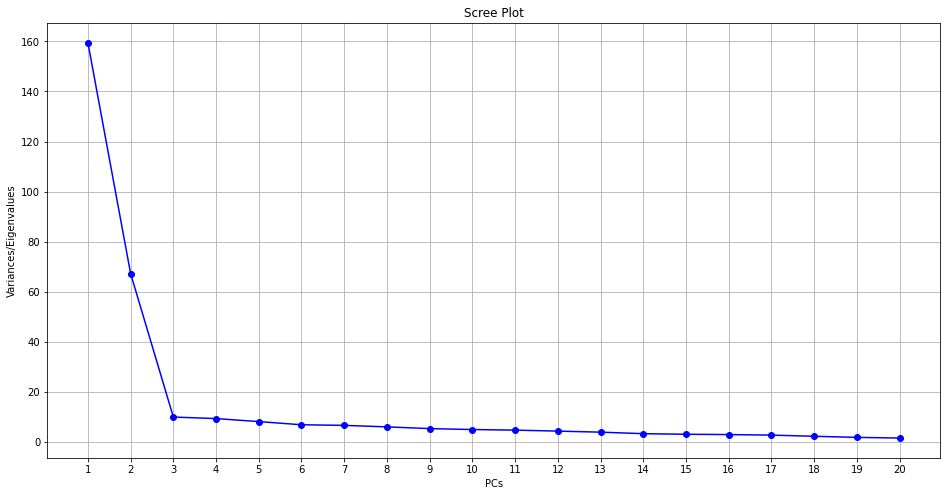

In [14]:
# Scree Plot
plt.figure(figsize = (16,8))
plt.plot([i for i in range(1,len(eig_value) + 1)], eig_value_sorted, 'b-', marker = 'o')
plt.xlabel("PCs")
plt.ylabel(r"Variances/Eigenvalues")
plt.title("Scree Plot")
plt.xticks(range(1,len(eig_value)+1))
plt.grid()
plt.show()

## Exercise H1.4: Image data compression and reconstruction

In [15]:
from matplotlib import image as mpimg
import os

##### a)

In [18]:
patches_n = np.zeros((5000, 256))
patches_b = np.zeros((5000, 256))

cen = 1 # centinel
for i in range(1,11):
    img_n = plt.imread(f"imgpca/n{i}.jpg")
    img_b = plt.imread(f"imgpca/b{i}.jpg")
    
    for j in range(500):
        # picks random points (x,y) inside the grid of the image, up to the border - 16
        x_n = np.random.randint(img_n.shape[0] - 16)
        y_n = np.random.randint(img_n.shape[1] - 16)
        x_b = np.random.randint(img_b.shape[0] - 16) # we pick different random points for n and b
        y_b = np.random.randint(img_b.shape[1] - 16)
        # patch with the square of 16x16 with initial vertex at (x,y)
        patch_n = img_n[x_n:x_n + 16, y_n:y_n + 16].flatten() # flatten to convert into vector
        patch_b = img_b[x_b:x_b + 16, y_b:y_b + 16].flatten()
    
        patches_n[cen-1] = patch_n
        patches_b[cen-1] = patch_b
        
        cen += 1
        
patches_n = np.array(patches_n).T
patches_b = np.array(patches_b).T

print(patches_n[0].shape, patches_b.shape)

(5000,) (256, 5000)


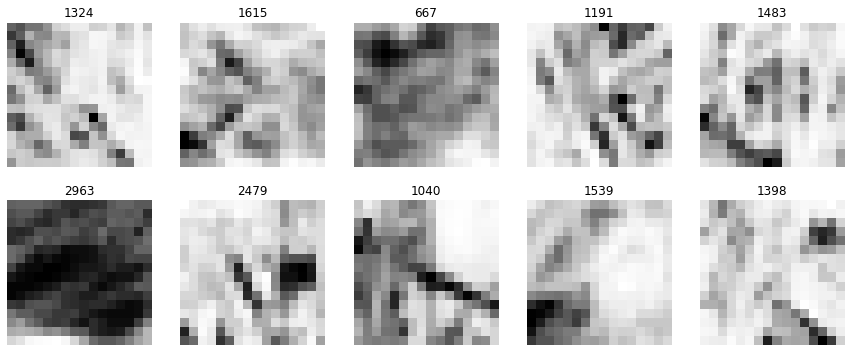

In [17]:
# Shows some nature patches.
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
for ax in axes.flatten():
    rand_img = np.random.randint(len(patches_n[0]))
    plt.sca(ax)
    plt.imshow(patches_n[:, rand_img].reshape(16, 16), cmap='Greys', interpolation=None)
    plt.title(str(rand_img))
    plt.axis('off')

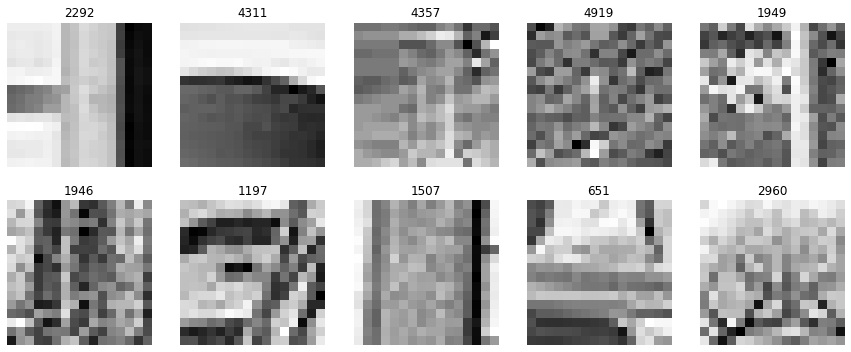

In [175]:
# Shows some building patches.
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
for ax in axes.flatten():
    rand_img = np.random.randint(len(patches_b[0]))
    plt.sca(ax)
    plt.imshow(patches_b[:, rand_img].reshape(16, 16), cmap='Greys', interpolation=None)
    plt.title(str(rand_img))
    plt.axis('off')

##### b)

In [176]:
# Center data
mean_n = np.mean(patches_n, axis = 1) # Saves the means for later
mean_b = np.mean(patches_b, axis = 1) 

patches_n_centered = patches_n - np.expand_dims(mean_n, axis = 1) # uses expand for broadcasting
patches_b_centered = patches_b - np.expand_dims(mean_b, axis = 1)

# Covariance and Eigendecomposition
covariance_n = np.cov(patches_n_centered)
eig_value_n, eig_vector_n = np.linalg.eig(covariance_n)

covariance_b = np.cov(patches_b_centered)
eig_value_b, eig_vector_b = np.linalg.eig(covariance_b)

# Sorting
sorted_index_n = np.argsort(eig_value_n)[::-1] # From highest to lowest
eig_value_n_sorted = eig_value_n[sorted_index_n]
eig_vector_n_sorted = eig_vector_n[:, sorted_index_n]

sorted_index_b = np.argsort(eig_value_b)[::-1]
eig_value_b_sorted = eig_value_b[sorted_index_b]
eig_vector_b_sorted = eig_vector_b[:, sorted_index_b]

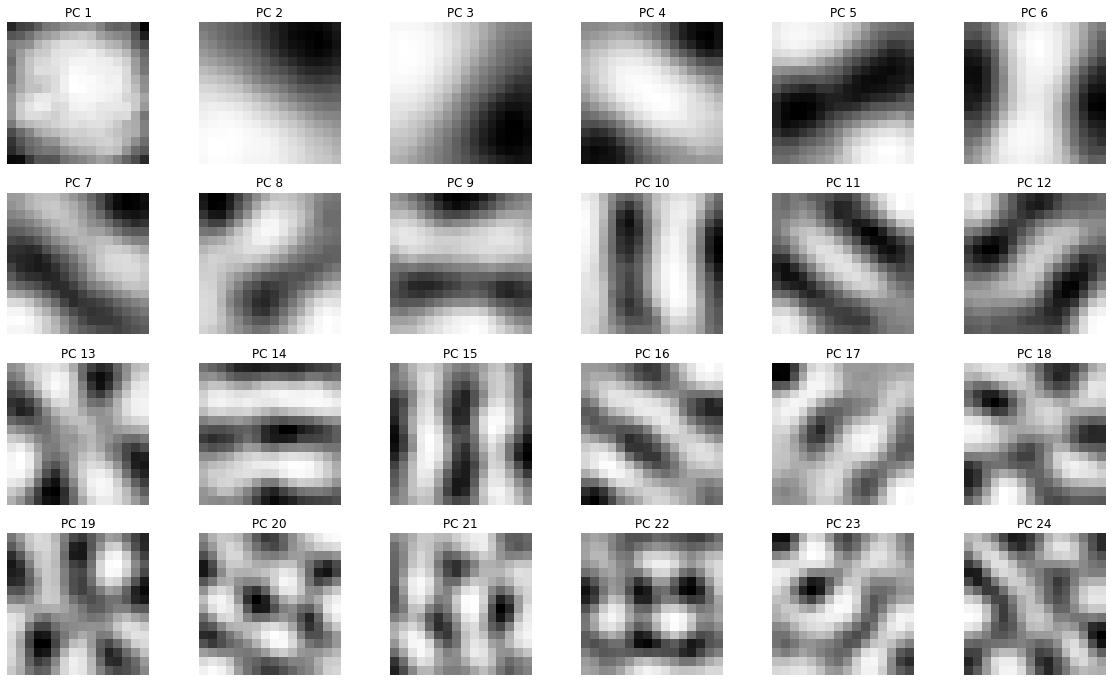

In [178]:
# Visualizes the first 24 PCs for nature images
fig, axes = plt.subplots(4, 6, figsize=(20, 12))
for (i, ax) in enumerate(axes.flatten()):
    plt.sca(ax)
    plt.imshow(eig_vector_n_sorted[:, i].reshape(16, 16), cmap='Greys')
    plt.title(f"PC {i+1}")
    plt.axis('off')

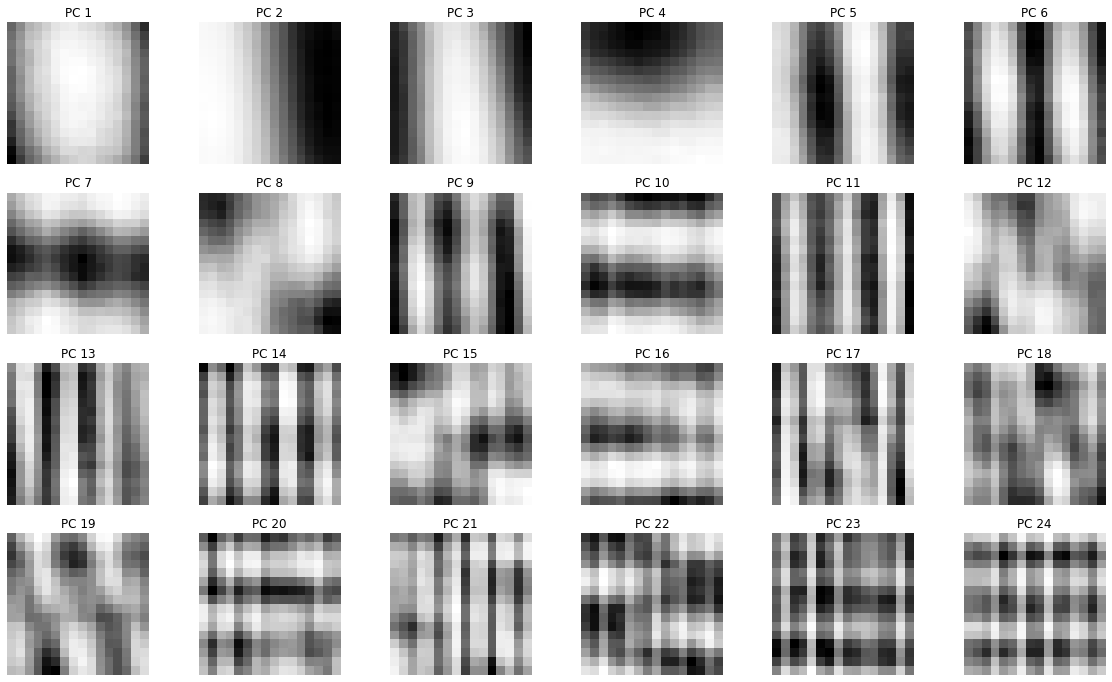

In [179]:
# Visualizes the first 24 PCs for bulding images
fig, axes = plt.subplots(4, 6, figsize=(20, 12))
for (i, ax) in enumerate(axes.flatten()):
    plt.sca(ax)
    plt.imshow(eig_vector_b_sorted[:, i].reshape(16, 16), cmap='Greys')
    plt.title(f"PC {i+1}")
    plt.axis('off')

##### c)

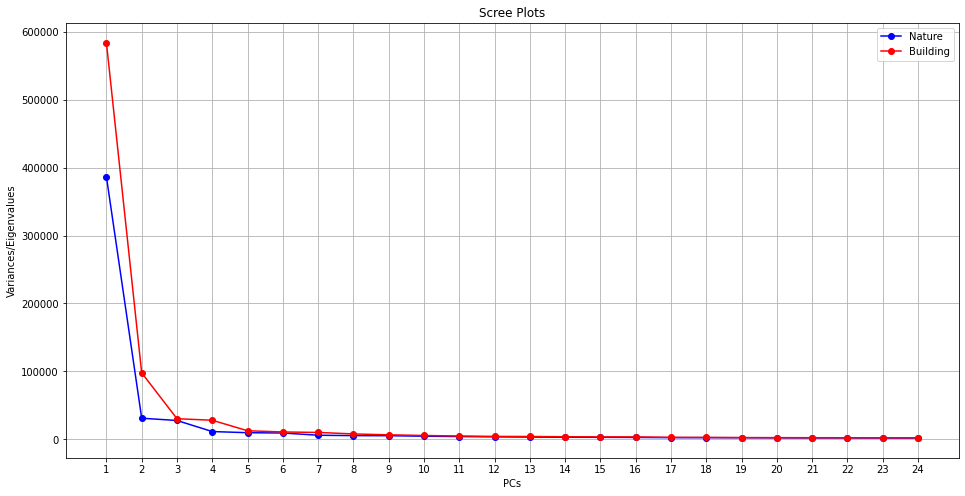

In [180]:
# Scree plot of the first 24 PCs of nature images
plt.figure(figsize = (16,8))
plt.plot([i for i in range(1, 25)], eig_value_n_sorted[:24], 'b-', marker = 'o', label = "Nature")
plt.plot([i for i in range(1, 25)], eig_value_b_sorted[:24], 'r-', marker = 'o', label = "Building")
plt.xlabel("PCs")
plt.ylabel(r"Variances/Eigenvalues")
plt.title("Scree Plots")
plt.xticks(range(1,25))
plt.grid()
plt.legend()
plt.show()

##### d) (i)

First we pick particular images (3 for nature and 3 for buldings) and break them into **ordered** patches, i.e. we pick one patch after the other without overlaping.

In [189]:
size = 16
imgs_n_patches = [[],[],[]]
imgs_b_patches = [[],[],[]]

# Picks particular images
imgs_n = [[],[],[]]
imgs_b = [[],[],[]]

for (p, img_num) in enumerate([1,2,3]):
    imgs_n[p] = plt.imread(f"imgpca/n{img_num}.jpg")
for (p, img_num) in enumerate([1,2,3]):
    imgs_b[p] = plt.imread(f"imgpca/b{img_num}.jpg")

for p in range(3):
    img_n = imgs_n[p]
    img_b = imgs_b[p]
    
    # patches for nature images
    for i in range(img_n.shape[0]//size):
        for j in range(img_n.shape[1]//size):
            patch_n = img_n[i*size:(i+1)*size, j*size:(j+1)*size].flatten() # flatten to convert into vector
            imgs_n_patches[p].append(patch_n)
    
    # patches for building images (for buildings the shapes are not multiples of 16 
    # so the slicing over the images is a bit more tricky) STILL NEED TO BE FIXED!
    for i in range(img_b.shape[0]//size):
        for j in range(img_b.shape[1]//size):
            patch_b = img_b[i*size:(i+1)*size, j*size:(j+1)*size].flatten() # flatten to convert into vector
            imgs_b_patches[p].append(patch_b)
    
    imgs_n_patches[p] = np.array(imgs_n_patches[p]).T
    imgs_b_patches[p] = np.array(imgs_b_patches[p]).T

print(imgs_n_patches[0].shape, imgs_b_patches[0].shape)

(256, 512) (256, 682)


Since our goal is to take each one of these patches and project them into subspaces, first we need to center the data. In order to be consistent with the computation we did before to get the PCs, we need to center this images by subtracting the same mean that we subtracted before. These means were saved at that time in `mean_n` and `mean_b` o be used here.

In [238]:
img_ni_patches = imgs_n_patches[0]

# Center data (using same mean as for performing the eigen-decomposition)
img_ni_patches_centered = img_ni_patches - np.expand_dims(mean_n, axis = 1)

# Transforms data using eigenvectors
img_ni_patches_transformed = np.dot(eig_vector_n_sorted.T, img_ni_patches_centered)

# Projection of the patches of the image into single PC subspaces for the first 100 PCs
patches_n_single_projections = np.zeros((100, img_ni_patches.shape[0], img_ni_patches.shape[1]))
for i in range(100):
    ei = eig_vector_n_sorted[:, i] # i-th eigenvector
    project_space = np.array([ui*ei for ui in img_ni_patches_transformed[i]]).T # projection to the space spanned by the i-th eigenvector
    patches_n_single_projections[i] = project_space
    
# Projects into the first M spaces by considering the cases M =1,2,4,8,16 and 100
M_list = [1,2,4,8,16,100]
patches_n_M_projections =  np.zeros((len(M_list), img_ni_patches.shape[0], img_ni_patches.shape[1]))

for (i,M) in enumerate(M_list):
    # picks a particular M and sums all single projections up to M 
    patches_n_M_projections[i] = np.sum(patches_n_single_projections[:M], axis = 0)

##### d) (ii)

At this point, for each image, we have all its non-overlaping patches projected into 6 different subspaces $(M=1,2,4,8,16,100)$. Now, we want to reconstuct each image by putting together the projected patches by using

* The projected spaces of the same category as the original image (i.e. nature with nature, and bulding with bulding)

* The projected spaces of the opposite category.

(-0.5, 15.5, 15.5, -0.5)

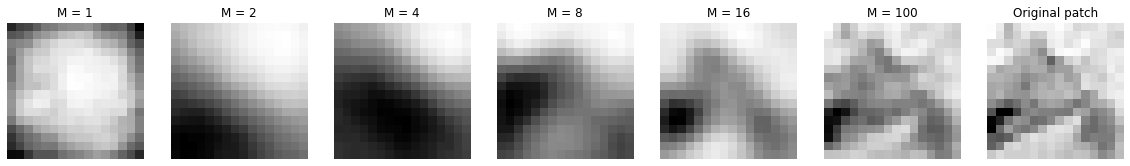

In [239]:
# Same category

# Picks random patch
patch_number = np.random.randint(img_ni_patches.shape[1])
patch = img_ni_patches[:, patch_number]

# Picks corresponding projected patch into the 6 different subspaces
projected_patch = patches_n_M_projections[:, :, patch_number]

# Visualizes the original patch and its 6 different projections
fig, axes = plt.subplots(1, 7, figsize=(20, 12))
for (i, ax) in enumerate(axes.flatten()[:6]):
    plt.sca(ax)
    plt.imshow(projected_patch[i, :].reshape(16, 16), cmap='Greys')
    plt.title(f"M = {M_list[i]}")
    plt.axis('off')
    
plt.sca(axes[6])
plt.imshow(patch.reshape(16, 16), cmap='Greys')
plt.title(f"Original patch")
plt.axis('off')